# ML basics - Homework

In [ ]:
#######################
###### TODO FILL ######
#######################

#@title Author { run: "auto" }
NAME = "" #@param {type: "string"}
EMAIL = "" #@param {type: "string"}

## Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import f1_score

## Download the dataset

In [ ]:
#!pip install gdown
!gdown https://drive.google.com/uc?id=1LdKFD55N4A72qTx1IK6LDW5Mo7L1g0uz
!unzip data.zip

Downloading...
From: https://drive.google.com/uc?id=1LdKFD55N4A72qTx1IK6LDW5Mo7L1g0uz
To: /content/data.zip
100% 120k/120k [00:00<00:00, 15.2MB/s]
Archive:  data.zip
  inflating: data/negatives.trn      
  inflating: data/negatives.tst      
  inflating: data/negatives.val      
  inflating: data/positives.trn      
  inflating: data/positives.tst      
  inflating: data/positives.val      


## Dataset loading

First task of this assigment is to load the dataset. Each sample of the dataset consists of 7 features $\mathbf{x}$ and a label $y$, thus a sample is a tuple $(\mathbf{x}, y)$, where $\mathbf{x} = \begin{bmatrix}
  x_1 & x_2 & x_3 & ... & x_7\end{bmatrix}^T$ and $y \in \{0, 1\}$. 

Positive and negative samples are stored in `data/positives.{trn, val, tst}` and `data/negatives.{trn, val, tst}` files, respectively. `*.trn`, `*.val`, `*.tst` contains the training, validation and test set, respectively.

**Task:** **(Total: 1 pts)**

* Finish `DataLoader` class which takes paths to the files to positive and negative samples, respectively. (Hint: use `np.loadtxt`) 

* Extract only the **6th** feature of the samples ($x_6$) (Index of the feature is stored in `FOI` variable). 

* Store the 6th feature of the positive samples in `pos` variable member (`pos` should have a shape $(N_{pos},)$). **(0.25 pts)**

* Store the 6th feature of the negative samples in `neg` variable member (`neg` should have a shape $(N_{neg},)$). **(0.25 pts)**

* Concatenate all samples (`pos`, `neg`) into `xs` resulting a vector with $(N_{pos}+N_{neg},)$ shape **(0.25 pts)**

* `targets` should contain labels of the samples, where 1 and 0 correspond to a positive and negative sample, respectively. Thus `targets` have a shape $(N_{pos}+N_{neg},)$. **(0.25 pts)**

In [ ]:
FOI = 5     # Feature of interest

class DataLoader:
    def __init__(self, pos_path: str, neg_path: str):
        """
        :param pos_path: Filepath to a "positives.*" file.
        :param neg_path: Filepath to a "negatives.*" file
        """

        #######################
        #### TODO YOUR CODE ###
        #######################
        self.pos = np.loadtxt(pos_path)[..., FOI]
        self.neg = np.loadtxt(neg_path)[..., FOI]
        self.xs = np.concatenate((self.pos, self.neg))
        self.targets = np.zeros(self.xs.shape[0], dtype=int)
        self.targets[:self.pos.shape[0]] = 1

train_set = DataLoader(pos_path="data/positives.trn", neg_path="data/negatives.trn")
val_set = DataLoader(pos_path="data/positives.val", neg_path="data/negatives.val")
test_set = DataLoader(pos_path="data/positives.tst", neg_path="data/negatives.tst")

print(f"Training set size: {train_set.xs.shape}")
print(f"Training target set size: {train_set.targets.shape}")
print(f"Training positives set size: {train_set.pos.shape}")
print(f"Training negatives set size: {train_set.neg.shape}")

Training set size: (9121,)
Training target set size: (9121,)
Training positives set size: (2280,)
Training negatives set size: (6841,)


## Plotting the data 

**Task:** **(Total: 1 pts)**

* Implement function for plotting two separate distributions of positive and negative samples feature using histogram (Use `plt.hist`, normalize the histograms by setting `density=true`.) Set `alpha=0.5`. 
* Display the legend, so it's clear which distribution belongs to which label (positive, negative).

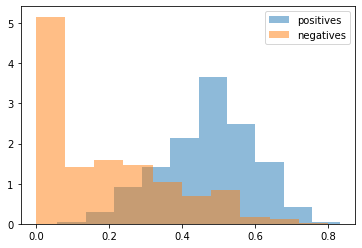

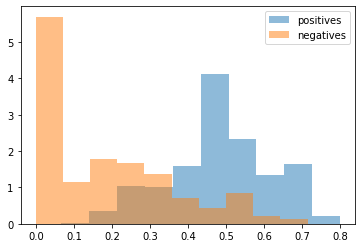

In [ ]:
def plot_data(pos: np.array, neg: np.array):
    """
    :param pos: Positive samples
    :param neg: Negative samples
    """

    #######################
    #### TODO YOUR CODE ###
    #######################
    plt.hist(pos, label="positives", alpha=0.5, density=True)
    plt.hist(neg, label="negatives", alpha=0.5, density=True)
    plt.legend()
    plt.show()

plot_data(pos=train_set.pos, neg=train_set.neg)
plot_data(pos=val_set.pos, neg=val_set.neg)

## Metrics

In this part of the assigment you will implement functions which computes accuracy and F1 score given groundtruth and predicted labels.

### Accuracy

Accuracy is defined as follows:
$$Accuracy = \frac{\textrm{Number of correct predictions}}{\textrm{Total number of predictions}}$$

### F1 score
F1 score is computed using precision and recall metrics, which are defined as follows:
$$precision = \frac{TP}{TP + FP}$$

$$recall = \frac{TP}{TP + FN}$$
where TP, FP, FN stand for true positive, false positive and false negative samples, respectively.

$$\textrm{F1 score} = \frac{2\cdot precision\cdot recall}{precision + recall}$$

**Task:** **(Total 0.5 pts)**
* Implement a function which computes accuracy given true labels and predicted labels.

* Check the documentation of `sklearn.metrics.f1_score` (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [ ]:
def accuracy(y_true: np.array, y_pred: np.array) -> float:
    """
    :param y_true: Ground truth labels.
    :param y_pred: Predicted labels.
    :return: Accuracy of the predictions.
    """

    #######################
    #### TODO YOUR CODE ###
    #######################
    return np.sum(y_true == y_pred) / len(y_true)

## Thresholding

Since $x_6 \in [0, 1]$, a simple model can be created as follows:

$$\hat{y} = \begin{cases}0, &\text{if}\ x_6 < T\\ 1, & \text{otherwise} \end{cases}$$

where $T$ is hyperparameter representing a threshold.

**Task:** **(Total: 2.5 pts)**

* Implement `threshold` function which for given threshold `T` and feature `feature` computes the prediction $\hat{y}$. **(0.5 pts)**
* Given a list of thresholds `thresholds` compute the accuracy and F1 score for each threshold on the training set. Use `sklearn.metrics.f1_score` and previously implemented `accuracy`. **(0.5 pts)**
* Which threshold would you select and why? (Just by looking at the plots, no need to run optimization).  **(0.5 pts)**
* Answer below why is F1 score better metric than accuracy in this particular case? **(1 pts)**

**Answer:** TODO answer

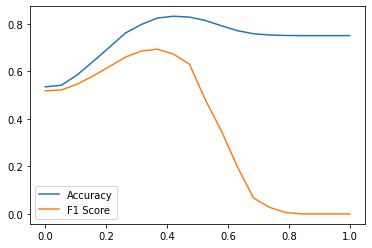

In [ ]:
thresholds = np.linspace(start=0., stop=1., num=20)

def threshold(feature: np.array, T: float) -> np.array:
    """
    :param feature: Using given feature a sample label is predicted.
    :param T: Threshold which is used to separate classes.
    """

    #######################
    #### TODO YOUR CODE ###
    #######################
    return feature > T

#######################
#### TODO YOUR CODE ###
#######################
accuracies = [
    accuracy(train_set.targets, threshold(train_set.xs, t))
    for t in thresholds
]

f1_scores = [
    f1_score(train_set.targets, threshold(train_set.xs, t))
    for t in thresholds
]

plt.plot(thresholds, accuracies, label="Accuracy")
plt.plot(thresholds, f1_scores, label="F1 Score")
plt.legend()

## Baseline classifier

Baseline classifier ignores sample feature and returns random probability, that a sample belongs to the class 1 (positive). (Hint probability is in range $[0, 1]$. Use `np.random.random`.)

**Task:** **(Total: 0.5 pts)**
* Finish the implementation of the `RandomClassifier`.

In [ ]:
class BaseClassifier:
    def prob_class_1(self, xs: np.array) -> np.array:
        """
        :param xs: Input samples features.
        :return: Probability of a sample belonging to a class "1" (positive).
        """

        raise NotImplemented("prob_class_1 method not implemented.")

class RandomClassifier(BaseClassifier):
    def __init__(self):
        super().__init__()

    def prob_class_1(self, xs: np.array) -> np.array:
        #######################
        #### TODO YOUR CODE ###
        #######################
        return np.random.random(size=xs.shape)

## Generative classifier

In this part you will create generative classifiers based on gaussian probability distribution.

Generative classifier tries to model the distributions of each class. Given the data, mean $\mu$ and standard deviation $\sigma$ of a gaussian distribution can be estimated as follows:

$$\mu = E[\mathbf{X}] = \frac{1}{N} \sum_{i=1}^N X_i$$

$$\sigma = \sqrt{E[(\mathbf{X} - \mu)^2]}$$

where $N$  represents the number of samples $\mathbf{X}$. $E[.]$ computes the average value of a given vector.

**Task:** **(Total: 1 pts)**
* Compute the mean and standard deviation for each class (positive, negative) in the training set. You can use `np.mean`, Don|t use `np.std`.


In [ ]:
#######################
#### TODO YOUR CODE ###
#######################
mean_pos = np.mean(train_set.pos)
mean_neg = np.mean(train_set.neg)

std_pos = np.mean((train_set.pos - mean_pos) ** 2) ** 0.5
std_neg = np.mean((train_set.neg - mean_neg) ** 2) ** 0.5

print(f"Mean positive: {mean_pos}")
print(f"Std. positive: {std_pos}")
print(f"Mean negative: {mean_neg}")
print(f"Std. negative: {std_neg}")

Mean positive: 0.478428821613158
Std. positive: 0.12971703647258465
Mean negative: 0.17453641132613792
Std. negative: 0.17895975196381242


### Plotting the estimated distributions

**Task:** **(Total: 1 pts)**
* From the estimated parameters create the gaussian distributions using `scipy.stats.norm(loc, scale)` where `loc` and `scale` represents $\mu$ and $\sigma$, respectively. **(0.5 pts)**

* On top of the data distributions plotted using `plot_data`, plot the modeled gaussian distributions. Set range of x axis to $[-0.5, 1.5]$ (Sample x in that range as well). Sample the distributions using the method `.pdf(x)` of `scipy.stats.norm`. **(0.5 pts)**

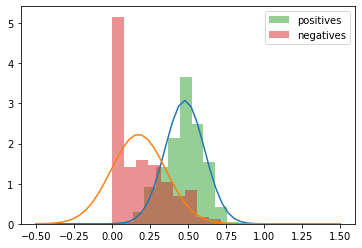

In [ ]:
#######################
#### TODO YOUR CODE ###
#######################
x = np.linspace(-0.5, 1.5)
norm_dist_pos = stats.norm(loc=mean_pos, scale=std_pos)
norm_dist_neg = stats.norm(loc=mean_neg, scale=std_neg)

plt.plot(x, norm_dist_pos.pdf(x))
plt.plot(x, norm_dist_neg.pdf(x))
plot_data(pos=train_set.pos, neg=train_set.neg)

### Computing the posterior probability

Posterior probability (sample belonging to the class $c$ given data $x$) can be computed using the Bayes rule:

$$P(y = c | x) \frac{P(x|y=c)P(y=c)}{\sum_{c'}P(x|y=c')P(y=c')}$$ 

where $P(x|y = c)$ are the previously estimated distributions. $P(y=c)$ is the class prior probability.

The constructor of `GenerativeClassifier`takes the estimated normal distributions of samples in the training set and the prior probabilities.

For more details: https://medium.com/swlh/understanding-gaussian-classifier-6c9f3452358f


**Task:** **(Total: 1 pts)**
* Implement the `prop_class_1` method, which returns the probability, that a sample belongs to the class 1 (positive). (Hint: use `.pdf` for sampling $P(x|y=c)$.)

In [ ]:
class GenerativeClassifier(BaseClassifier):
    def __init__(self, pos_norm, neg_norm, pos_prior: float, neg_prior: float):
        super().__init__()

        self.pos_norm = pos_norm
        self.neg_norm = neg_norm
        self.pos_prior = pos_prior
        self.neg_prior = neg_prior

    def prob_class_1(self, xs: np.array) -> np.array:
        #######################
        #### TODO YOUR CODE ###
        #######################
        cond_pos = self.pos_norm.pdf(xs)
        cond_neg = self.neg_norm.pdf(xs)
        joint_prob_pos = cond_pos * self.pos_prior

        return joint_prob_pos / (joint_prob_pos + cond_neg * self.neg_prior)

**Task:** **(Total: 1.5 pts)**
* Create a generative classifier `generative_classifier_flat_prior` with priors $P(y=1) = 0.5, P(y=0) = 0.5$. **(0.5 pts)**

* Create a generative classifier `generative_classifier_full_prior` with priors $P(y=1) = 0.2, P(y=0) = 0.8$. **(0.5 pts)**

* Plot both posterior probabilities over the train data histogram. Set range of x axis to $[-0.5, 1.5]$. (Hint: Sample the probabilities using `x`) **(0.5 pts)**

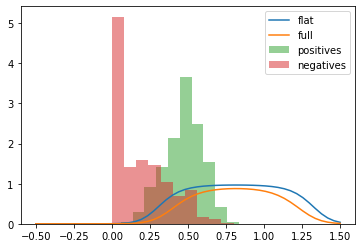

In [ ]:
x = np.linspace(start=-0.5, stop=1.5)

#######################
#### TODO YOUR CODE ###
#######################
generative_classifier_flat_prior = GenerativeClassifier(norm_dist_pos, norm_dist_neg, 0.5, 0.5)
generative_classifier_full_prior = GenerativeClassifier(norm_dist_pos, norm_dist_neg, 0.2, 0.8)

plt.plot(x, generative_classifier_flat_prior.prob_class_1(x), label="flat")
plt.plot(x, generative_classifier_full_prior.prob_class_1(x), label="full")
plot_data(pos=train_set.pos, neg=train_set.neg)

## Evaluation

Given the `thresholds` threshold the probabilities and evaluate `RandomClassifier` and `GenerativeClassifier` (full prior) using accuracy and F1 score on the **test set**.

**Task:** **(Total: 2 pts)**
* Compute accuracies and F1 scores for `RandomClassifier` and `GenerativeClassifier` for each threshold. **(1 pts)**

* Plot computed the accuracies on the y-axis with `thresholds` on the x-axis. **(0.5 pts)**


* Plot computed the F1 scores on the y-axis with `thresholds` on the x-axis. **(0.5 pts)**

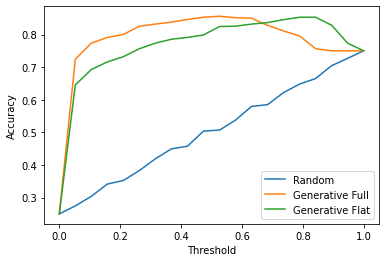

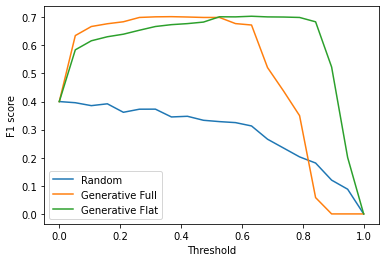

In [ ]:
#######################
#### TODO YOUR CODE ###
#######################
classifiers = {"Random": RandomClassifier(), "Generative Full": generative_classifier_full_prior, "Generative Flat": generative_classifier_flat_prior}
metrics = {"Accuracy": accuracy, "F1 score": f1_score}

for metric_name, metric in metrics.items():
    for classifier_type, classifier in classifiers.items():
        print()

        computed_metric = list(map(
            lambda T: metric(test_set.targets, classifier.prob_class_1(test_set.xs) > T),
            thresholds
        ))

        plt.plot(thresholds, computed_metric, label=classifier_type)
    plt.ylabel(metric_name)
    plt.xlabel("Threshold")
    plt.legend()
    plt.show()

## Polynomial Regression

Given data $y = sin(x)$, a noise will be added to the training data resulting in $y' = sin(x) + noise$.

Retrieve the parameters of a polynomial model using `np.polyfit`, given the model parameters a model can be constructed using `np.poly1d`.

See: https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
https://www.w3schools.com/python/python_ml_polynomial_regression.asp

**Task:** **(Total 2.5 pts)**
* Implement a model learning the function $y$ given only $y'$ (`y_train`). **(0.5 pts)**
* Create two polynomial models with the **polynomial degree 3 and 15**. **(0.5 pts)**
* Using the test set compute and print the MSE error for each model - $MSE = \frac{1}{N} \sum(y - \hat{y})^2$, where $\hat{y}$, $N$ stands for predicted value and number of samples, respectively. **(0.5 pts)**
* Answer below, which model is better and why. **(1 pts)**

**Answer:** TODO answer

MSE Deg 3: -0.028362387634545252
MSE Deg 15: -0.03999059002614189


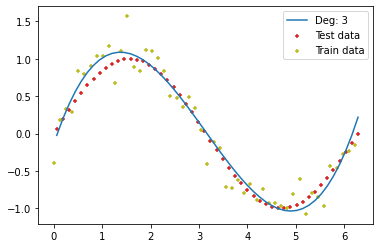

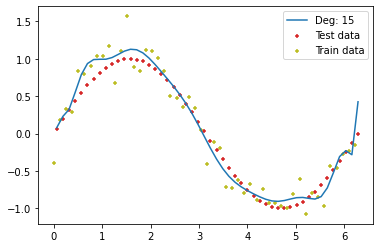

In [ ]:
from math import pi

x = np.linspace(start=0, stop=2 * pi, num=100)
x_train = x[::2]
x_test = x[1::2]

noise = np.random.randn(*x_train.shape) * 0.2
y_train = np.sin(x_train) + noise
y_test = np.sin(x_test)

#######################
#### TODO YOUR CODE ###
#######################
reg_model_deg_3 = np.poly1d(np.polyfit(x_train, y_train, deg=3))
reg_model_deg_15 = np.poly1d(np.polyfit(x_train, y_train, deg=15))

print(f"MSE Deg 3: {np.mean(y_test - reg_model_deg_3(x_test))}")
print(f"MSE Deg 15: {np.mean(y_test - reg_model_deg_15(x_test))}")

plt.plot(x_test, reg_model_deg_3(x_test), label="Deg: 3")
plt.scatter(x_test, y_test, marker="+", s=10, label="Test data", c='#d62728')
plt.scatter(x_train, y_train, marker="+", s=10, label="Train data", c='#bcbd22')
plt.legend()
plt.show()

plt.plot(x_test, reg_model_deg_15(x_test), label="Deg: 15")
plt.scatter(x_test, y_test, marker="+", s=10, label="Test data", c='#d62728')
plt.scatter(x_train, y_train, marker="+", s=10, label="Train data", c='#bcbd22')
plt.legend()